# Codificación de Datos
 ## Se codifican los datos importados y preprocesados con anterioridad.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('..\\')
from Preprocesado.Codificacion import codificaEstandar, codificaAmpliado

In [2]:
# Importamos el listado original de los datos
df = pd.read_excel('Listados_Preprocesados\ListadoInterv_Preprocesado.xlsx')
# Visualizamos el tipo de los datos
df.dtypes

Unnamed: 0              int64
NHC                     int64
INTERVENCIÓN          float64
TIPO                    int64
TURNO                   int64
CARÁCTER ECONÓMICO      int64
PONDERACIÓN             int64
DURACIÓN                int64
ESPECIALIDAD           object
dtype: object

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.to_csv('Listados_Preprocesados\ListadoInterv_Preprocesado.csv', index=False)
df = codificaEstandar(df)

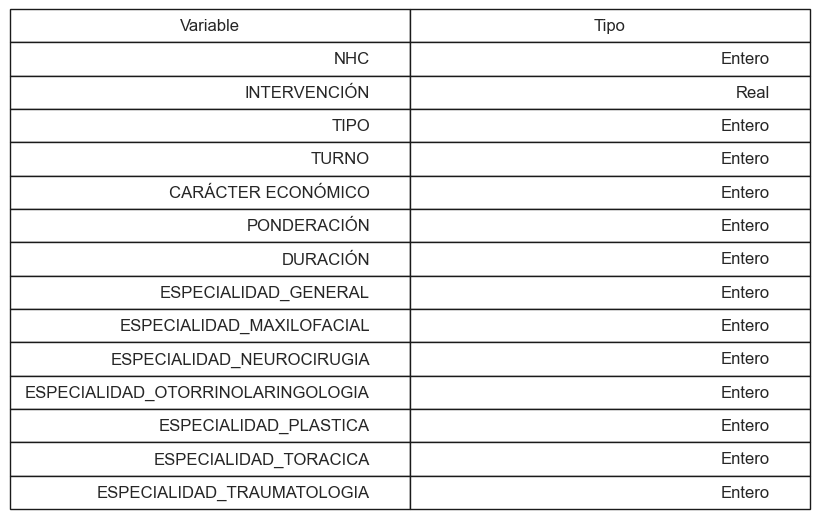

In [14]:
import matplotlib.pyplot as plt
# Creamos una tabla el nombre de las variables y el tipo de dato que son
df_tipos = pd.DataFrame(df.dtypes, columns=['Tipo'])
df_tipos = df_tipos.reset_index()
df_tipos.columns = ['Variable', 'Tipo']
# Creamos una tabla bonita con los tipos de datos
df_tipos['Tipo'] = df_tipos['Tipo'].astype(str)
df_tipos['Tipo'] = df_tipos['Tipo'].str.replace('int64', 'Entero')
df_tipos['Tipo'] = df_tipos['Tipo'].str.replace('float64', 'Real')
df_tipos['Tipo'] = df_tipos['Tipo'].str.replace('uint8', 'Entero')
df_tipos['Tipo'] = df_tipos['Tipo'].str.replace('uint16', 'Entero')
df_tipos['Tipo'] = df_tipos['Tipo'].str.replace('uint32', 'Entero')

# Representamos los tipos de datos en una tabla para exportar a png
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
tabla = ax.table(cellText=df_tipos.values, colLabels=df_tipos.columns, loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 2)
plt.show()

In [13]:
print(df.head(5))

       NHC  INTERVENCIÓN  TIPO  TURNO  CARÁCTER ECONÓMICO  PONDERACIÓN  \
0  1000738          86.7     1      1                  33           33   
1  1001107          86.4     1      0                  36           36   
2  1001240          86.4     1      0                  18            7   
3  1001395          86.4     1      0                  55           55   
4  1001623          86.7     1      1                 146          146   

   DURACIÓN  ESPECIALIDAD_GENERAL  ESPECIALIDAD_MAXILOFACIAL  \
0        29                     0                          0   
1        33                     0                          0   
2        65                     0                          0   
3        60                     0                          0   
4        42                     0                          0   

   ESPECIALIDAD_NEUROCIRUGIA  ESPECIALIDAD_OTORRINOLARINGOLOGIA  \
0                          0                                  0   
1                          0        

In [14]:
# Exportamos a un excel
df.to_excel('Listados_Preprocesados\ListadoInterv_Preprocesado_Codificado.xlsx', index=False)

In [15]:
# Cargamos el listado de PLASTICA
df = pd.read_excel('Listados_Preprocesados\ListadoInterv_Preprocesado_PLASTICA.xlsx')
# Visualizamos el tipo de los datos
df.dtypes

Unnamed: 0                                                   int64
NHC                                                          int64
INTERVENCIÓN                                               float64
TIPO                                                         int64
TURNO                                                        int64
CARÁCTER ECONÓMICO                                           int64
PONDERACIÓN                                                  int64
DURACIÓN                                                     int64
ESPECIALIDAD                                                object
Usuario (Sexo)                                              object
Asa                                                         object
Garantía del procedimiento (Con garantía| Sin garantía)     object
Código facultativo responsable                               int64
Código diagnóstico                                          object
Código especialidad                                          i

In [16]:
# Eliminar la columna 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis=1)
df = codificaAmpliado(df)

In [17]:
print(df.head(5))

       NHC  INTERVENCIÓN  TIPO  TURNO  CARÁCTER ECONÓMICO  PONDERACIÓN  \
0  1001107         86.40     1      0                  36           36   
1  1001395         86.40     1      0                  55           55   
2  1001395         86.40     1      0                  55           55   
3  1001623         86.70     1      1                 146          146   
4  1002204         86.74     1      1                  41           41   

   DURACIÓN  Usuario (Sexo)  Asa  \
0        33               0    3   
1        60               0    3   
2        60               0    3   
3        42               1    1   
4        72               0    3   

   Garantía del procedimiento (Con garantía| Sin garantía)  \
0                                                  2         
1                                                  2         
2                                                  0         
3                                                  2         
4                           

In [18]:
# Pasamos a excel
df.to_excel('Listados_Preprocesados\ListadoInterv_Preprocesado_PLASTICA_Codificado.xlsx', index=False)